In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def rectangle(x=0, y=0, width=1, length=1, step=.1, cetner=False):
    if cetner:
        x = -1*int(width/2)
        y = -1*int(length/2)
    step_inv = int(1 / step)
    vertices = [(x, y), (x + width, y), (x + width, y + length), (x, y + length)]
    # Generate the points along the edges of the square
    points = []
    for i in range(len(vertices)):
        x1, y1 = vertices[i]    
        x2, y2 = vertices[(i + 1) % len(vertices)]
        if x1 == x2:  # Vertical edge        
            points.extend([(x1, y * step, 1) for y in range(min(y1, y2)*step_inv, max(y1, y2)*step_inv + 1, 1)])
        else:  # Horizontal edge        
            points.extend([(x * step, y1, 1) for x in range(min(x1, x2)*step_inv, max(x1, x2)*step_inv + 1, 1)])
    # Separate the x and y coordinates
    x_coords, y_coords, _ = zip(*points)
    return points, x_coords, y_coords


In [11]:
def similarity(points, theta=0, tx=0, ty=0, s=1):
    theta = np.pi * theta / 180
    transform_point = []
    iso_mat = np.array([
        [s*np.cos(theta),   -s * np.sin(theta) ,        tx],
        [s*np.sin(theta),   s * np.cos(theta),          ty],
        [0,                 0,                          1]
    ])
    for point in points:
        transform_point.append(iso_mat @ np.array(point).T)
    x_coords, y_coords, _ = zip(*transform_point)
    return transform_point, x_coords, y_coords

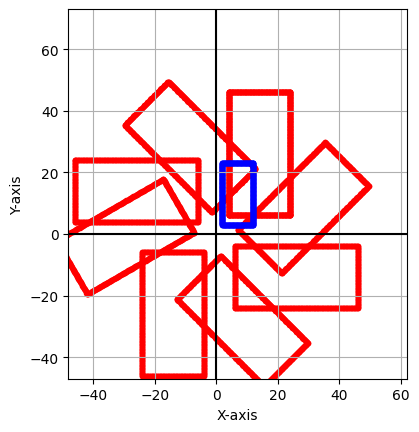

In [12]:
fig, ax = plt.subplots()

angles = [0, 45, 90, 120, 180, 225, 270, 315, 360]

points, x_coords, y_coords = rectangle(x=2, y=3, width=10, length=20, cetner=False)
for angle in angles:
    points2, x_coords2, y_coords2 = similarity(points, theta=angle, tx=0, ty=0, s=2)
    ax.scatter(x_coords2, y_coords2, marker='.', color='r')

# Plot the points
ax.scatter(x_coords, y_coords, marker='.', color='b')
# Set the axis limits
xlim = 50
ylim = 50
ax.set_xlim(min(x_coords) - xlim, max(x_coords) + xlim)
ax.set_ylim(min(y_coords) - ylim, max(y_coords) + ylim)
# Set the axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# Display the grid
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_aspect('equal', adjustable='box')
plt.show()


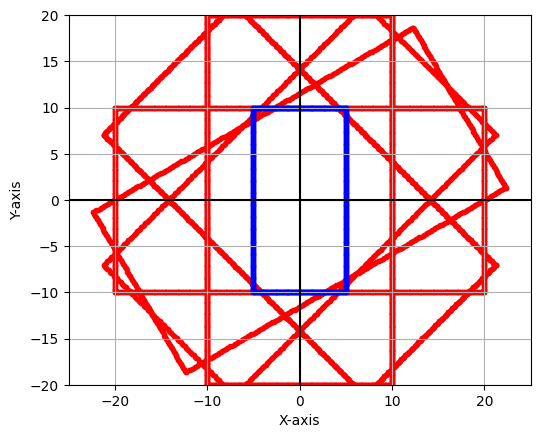

In [13]:
fig, ax = plt.subplots()

angles = [0, 45, 90, 120, 180, 225, 270, 315, 360]

points, x_coords, y_coords = rectangle(width=10, length=20, cetner=True)
for angle in angles:
    points2, x_coords2, y_coords2 = similarity(points, theta=angle, tx=0, ty=0, s=2)
    ax.scatter(x_coords2, y_coords2, marker='.', color='r')

# Plot the points
ax.scatter(x_coords, y_coords, marker='.', color='b')
# Set the axis limits
xlim = 20
ylim = 10
ax.set_xlim(min(x_coords) - xlim, max(x_coords) + xlim)
ax.set_ylim(min(y_coords) - ylim, max(y_coords) + ylim)
# Set the axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# Display the grid
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_aspect('equal', adjustable='box')
plt.show()

In [14]:
def similarity(point, theta=0, tx=0, ty=0, s=1):
    theta = np.pi * theta / 180
    iso_mat = np.array([
        [s*np.cos(theta),   -s * np.sin(theta) ,        tx],
        [s*np.sin(theta),   s * np.cos(theta),          ty],
        [0,                 0,                          1]
    ])
    transform_point=iso_mat @ np.array(point).T
    return transform_point

In [15]:
import cv2
im = cv2.imread('../src/barbara_gray.bmp', cv2.IMREAD_GRAYSCALE)
print(im.shape)
print(im)

(512, 512)
[[220 229 230 ... 107 106  91]
 [206 228 229 ...  94  97  97]
 [212 227 226 ...  84  97 100]
 ...
 [ 75  62  72 ...  34  43  30]
 [ 34  50  60 ...  35  29  37]
 [ 49  47  62 ...  43  30  29]]


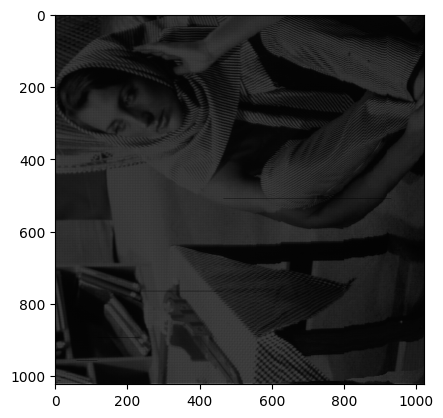

In [17]:
new_img_type = []
for i in range(512):
    for j in range(512):
        new_point = similarity([i,j,1], theta=90, s=2)
        i_new = int(new_point[0])
        j_new = int(new_point[1])
        new_img_type.append([i_new, j_new, im[i][j]])
new_img_type = np.array(new_img_type)
X, Y, C = zip(*new_img_type)
X -= np.min(X)
Y -= np.min(Y)
X_clipped = np.clip(X, 0, 255 - 1)
Y_clipped = np.clip(Y, 0, 255 - 1)
matrix_shape = (np.max(X) + 1, np.max(Y) + 1)
result_matrix = np.zeros(matrix_shape)
result_matrix[X, Y] = C


plt.imshow(result_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()